<a href="https://colab.research.google.com/github/raina-11/cnn_model_carif10/blob/master/Ciraf10_prediction__cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python import keras
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from keras.datasets import cifar10

In [0]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

[9]


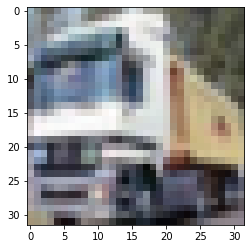

In [5]:
print(y_train[1])
plt.imshow(X_train[1])

In [6]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
## one hot encoding with to_categorical()

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
# scale pixels
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [0]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Flatten



In [0]:
def mymodel():
  model=Sequential()
  
  model.add(Conv2D(64,(3,3),input_shape=(32,32,3),padding='same',data_format='channels_last'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  return model

In [0]:
model=mymodel()
#preparing model for fitting 
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=7,batch_size=128)

Epoch 1/7
50000/50000 [==============================] - 521s 10ms/step - loss: 0.2925 - accuracy: 0.8954
Epoch 2/7
50000/50000 [==============================] - 520s 10ms/step - loss: 0.2010 - accuracy: 0.9223
Epoch 3/7
50000/50000 [==============================] - 522s 10ms/step - loss: 0.1605 - accuracy: 0.9380
Epoch 4/7
50000/50000 [==============================] - 520s 10ms/step - loss: 0.1349 - accuracy: 0.9488
Epoch 5/7
50000/50000 [==============================] - 514s 10ms/step - loss: 0.1135 - accuracy: 0.9579
Epoch 6/7
50000/50000 [==============================] - 520s 10ms/step - loss: 0.0974 - accuracy: 0.9645
Epoch 7/7
50000/50000 [==============================] - 521s 10ms/step - loss: 0.0828 - accuracy: 0.9705


In [17]:
result=model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print ("Loss = " + str(result[0]))
print ("Test Accuracy = " + str(result[1]))




10000/10000 [==============================] - 25s 3ms/step
Loss = 0.13916431535482407
Test Accuracy = 0.9520497918128967


In [0]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
y_pred_test = model.predict_proba(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

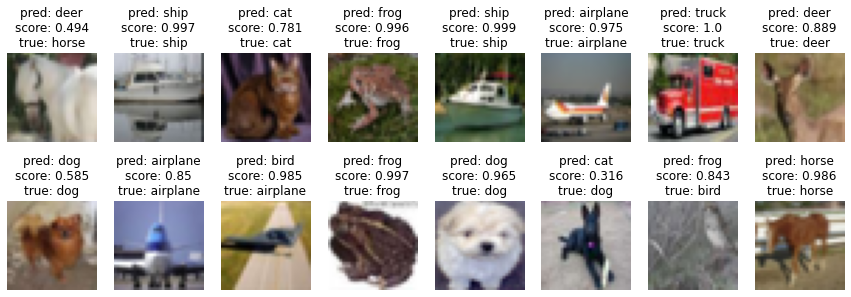

In [32]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[np.argmax(y_test[random_index])]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()
